# Introduction to OpenCV  

OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It is used in image processing and other computer vision tasks. We will learn the basics of OpenCV today followed by a fun project. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h4>Reading and Displaying an image</h4>

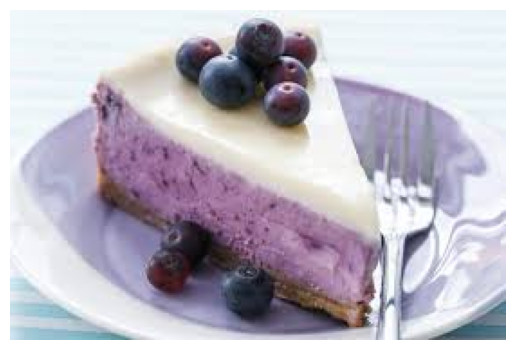

In [2]:
# Read an image from file
img = cv2.imread('./images/food.jpeg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



In [3]:
# Image as matrix of pixels
print("Image array")
print(img)

# Access pixel values
pixel_value = img[100, 50]  # Get pixel value at (50, 100)
print('Pixel Value:', pixel_value)

Image array
[[[251 248 240]
  [251 248 240]
  [251 248 240]
  ...
  [247 242 233]
  [247 242 233]
  [247 242 233]]

 [[251 248 240]
  [251 248 240]
  [251 248 240]
  ...
  [248 243 234]
  [248 243 234]
  [248 243 234]]

 [[251 248 240]
  [251 248 240]
  [251 248 240]
  ...
  [248 243 234]
  [248 243 234]
  [248 243 234]]

 ...

 [[244 230 208]
  [242 228 206]
  [239 225 202]
  ...
  [132 118  90]
  [132 118  89]
  [132 118  90]]

 [[243 229 207]
  [241 227 205]
  [238 224 201]
  ...
  [133 120  98]
  [133 121  97]
  [133 120  98]]

 [[241 227 205]
  [240 226 204]
  [236 222 199]
  ...
  [153 140 124]
  [153 141 123]
  [154 141 125]]]
Pixel Value: [ 83  76 113]


<h4> Convert to Gray Scale </h4>

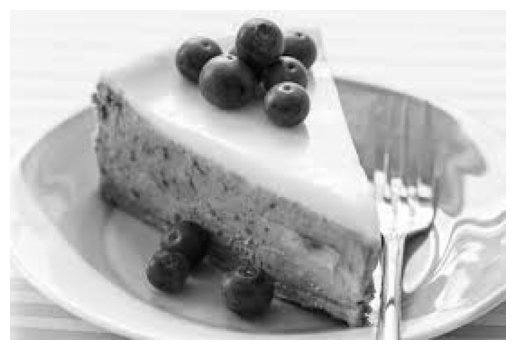

In [4]:
# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<h4> Resize an image </h4>

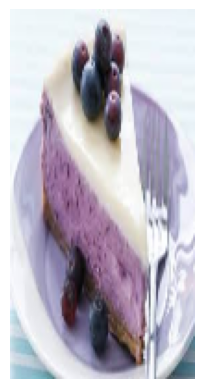

In [5]:
# Resize the image
resized_img = cv2.resize(img, (100, 200))

# Display the image
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<h4> Crop an image </h4>

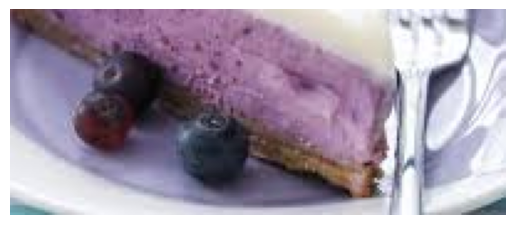

In [6]:
# Crop a region of interest
roi = img[100:300, 50:250]

# Display the image
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<h4> Blurring an image </h4>

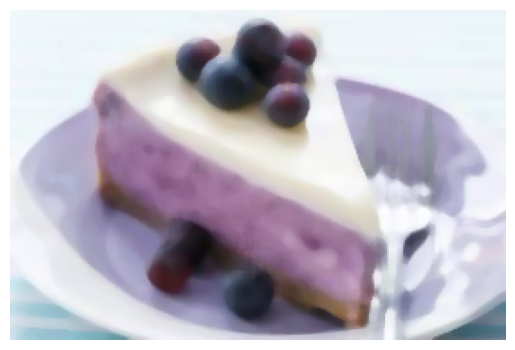

In [7]:
# Apply Median blur
blurred_img = cv2.medianBlur(img, 7, 0)    #image, kernel-size

# Display the image
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<h3> Arithmetic operations on images </h3>

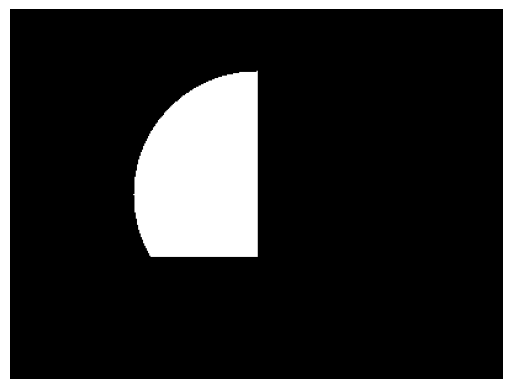

In [8]:
# Create two binary images (black and white) for demonstration
image1 = np.zeros((300, 400), dtype=np.uint8)
image2 = np.zeros((300, 400), dtype=np.uint8)

# Define regions in the images
cv2.rectangle(image1, (50, 50), (200, 200), 255, -1)    # White rectangle in image1
cv2.circle(image2, (200, 150), 100, 255, -1)            # White circle in image2

# Bitwise AND operation
bitwise_and = cv2.bitwise_and(image1, image2)


# Display the image
plt.imshow(cv2.cvtColor(bitwise_and, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

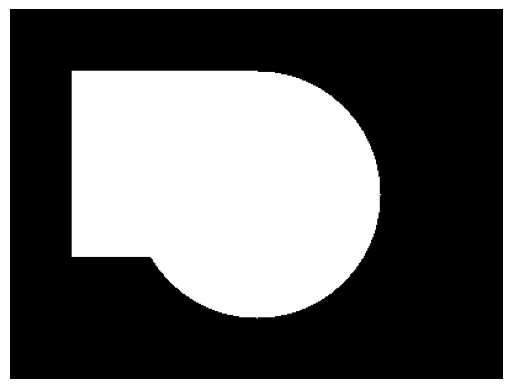

In [9]:
# Bitwise OR operation
bitwise_or = cv2.bitwise_or(image1, image2)

# Display the image
plt.imshow(cv2.cvtColor(bitwise_or, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

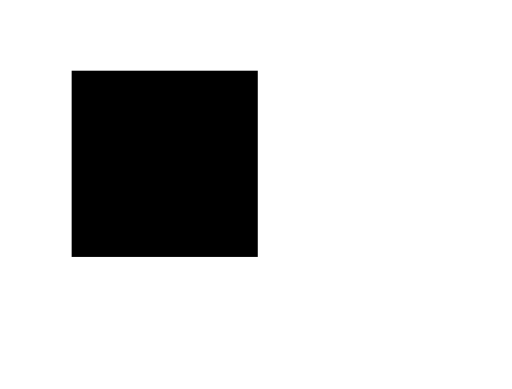

In [10]:
# Bitwise NOT operation
bitwise_not_image1 = cv2.bitwise_not(image1)

# Display the image
plt.imshow(cv2.cvtColor(bitwise_not_image1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

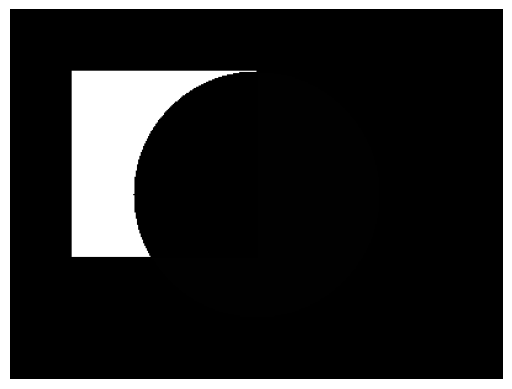

In [11]:
subtraction = image1 - image2

# Display the image
plt.imshow(cv2.cvtColor(subtraction, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# Invisibility Cloak

## Defining Functions

In [51]:
import cv2
import numpy as np

def create_mask(frame, lower_hsv, upper_hsv, kernel_size=3):
	inspect = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
	mask = cv2.inRange(inspect, lower_hsv, upper_hsv)
	mask = cv2.medianBlur(mask, 3)
	kernel = np.ones((kernel_size, kernel_size), np.uint8)
	mask = cv2.dilate(mask, kernel, iterations=5)

	return mask

def create_trackbars():
	cv2.createTrackbar("lower_hue", "bars", 68, 180, nothing)
	cv2.createTrackbar("lower_saturation", "bars", 55, 255, nothing)
	cv2.createTrackbar("lower_value", "bars", 54, 255, nothing)
	cv2.createTrackbar("upper_hue", "bars", 110, 180, nothing)
	cv2.createTrackbar("upper_saturation", "bars", 255, 255, nothing)
	cv2.createTrackbar("upper_value", "bars", 255, 255, nothing)

def get_trackbar_values():
	lower_value = cv2.getTrackbarPos("lower_value", "bars")
	lower_hue = cv2.getTrackbarPos("lower_hue", "bars")
	lower_saturation = cv2.getTrackbarPos("lower_saturation", "bars")
	upper_hue = cv2.getTrackbarPos("upper_hue",  "bars")
	upper_saturation = cv2.getTrackbarPos("upper_saturation",  "bars")
	upper_value = cv2.getTrackbarPos("upper_value",  "bars")

	return lower_hue, lower_saturation, lower_value, upper_hue, upper_saturation, upper_value

def nothing(x):
	pass

## Set up the cam

In [52]:
cap = cv2.VideoCapture(0)
bars = cv2.namedWindow("bars")

create_trackbars()

## Capture the initial frame for creating the background

In [53]:
while True:
	cv2.waitKey(1000)
	ret, init_frame = cap.read()
	if ret:
		break

## Start the cam

Slider values to detect red:

Lower -> 150H, 90S, 0V

Upper -> 180H, 255S, 255V (max)

In [54]:
while True:
	ret, frame = cap.read()

	lower_hue, lower_saturation, lower_value, upper_hue, upper_saturation, upper_value = get_trackbar_values()
	lower_hsv = np.array([lower_hue, lower_saturation, lower_value])
	upper_hsv = np.array([upper_hue, upper_saturation, upper_value])

	mask = create_mask(frame, lower_hsv, upper_hsv)

	mask_inv = 255 - mask

	# Bitwise operations to get the final frame
	frame_inv = cv2.bitwise_and(frame, frame, mask=mask_inv)

	# Bitwise operations to get the blanket area
	blanket_area = cv2.bitwise_and(init_frame, init_frame, mask=mask)

	# Combine the two frames
	final = cv2.bitwise_or(frame_inv, blanket_area)

	cv2.imshow("Cloak Cam", final)

	if cv2.waitKey(3) == ord('q'):
		break

cv2.destroyAllWindows()
cap.release()